# CAP 4630 - Intro to AI
## Assignment 4:
Flower classification using machine learning techniques

### Bryan Perdomo
### Dr. Marques Oge
### July 25 2021


This is a simple example of a 3-class classifier using the Fisher's Iris dataset.


Useful references and sources:

- https://en.wikipedia.org/wiki/Iris_flower_data_set
- https://www.kaggle.com/uciml/iris
- http://archive.ics.uci.edu/ml/datasets/Iris/
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html 
- https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html 
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html
- https://scikit-learn.org/stable/tutorial/basic/tutorial.html

### TODO 1
## My resources and references:

MinMaxScaler tutorial
https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79

Standarization and Normalization:
https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

Decision Tree Classifier Tutorial:
https://towardsdatascience.com/decision-tree-in-python-b433ae57fb93

Displaying species name:
https://stackoverflow.com/questions/39476020/get-feature-and-class-names-into-decision-tree-using-export-graphviz?rq=1



## Setup

We provide the initial setup of the notebook. In this section we import the necessary libraries so you can build your model.

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image 
from pydot import graph_from_dot_data 


from joblib import dump, load

## Part 1. Load the data

The first step is to load the necessary data. 

Use the command `read_csv` from pandas library to load the Iris dataset. After loading the data into a dataframe, show the top of the dataset. 

The dataset file URL is https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data.

In [ ]:
# load the data
cols = ['sepal_length', ' sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=cols)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Part 2. Explore and visualize the data



After loading the dataset into a dataframe in memory, the next step is to perform an exploratory data analysis. The objective of the EDA is to discover as much information as possible about the dataset. 

The `describe()` method is a good starting point. The `describe()` method prints statistics of the dataset, like mean, standard deviation, etc.

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


A very important tool in exploratory data analysis is data visualization, which helps us to gain insights about the dataset. 

### TODO 2

Write code to generate a pair plot for the Iris dataset.

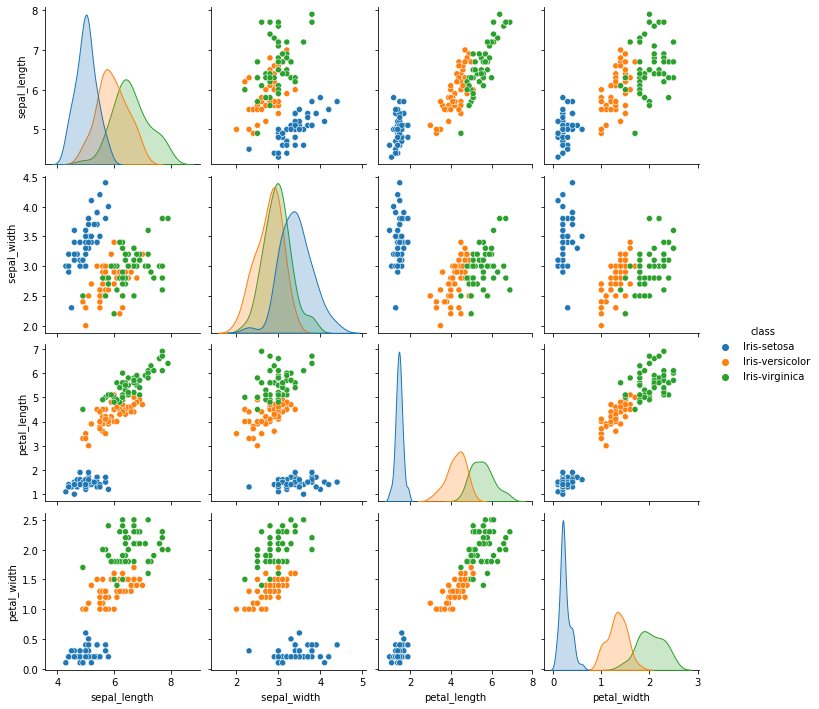

In [ ]:
sns.pairplot(iris, hue= 'class')
plt.show()

## Part 3. Preprocess the data

Frequently, the dataset collected from databases, files or scraping the internet is not ready
to be consumed by a machine learning algorithm. 

In most cases, the dataset needs some kind of preparation or preprocessing before being used as input to a machine learning algorithm. 

In this case, we convert the string values of the class column to integer numbers because the algorithm we are going to use does not process string values.

In [ ]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
iris['class_encod'] = iris['class'].apply(lambda x: 0 if x == 'Iris-setosa' else 1 if x == 'Iris-versicolor' else 2)
iris['class_encod'].unique()

array([0, 1, 2])

In [ ]:
y = iris[['class_encod']] # target attributes 
X = iris.iloc[:, 0:4] # input attributes
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,class_encod
0,0
1,0
2,0
3,0
4,0


### TODO 3
Write code to normalize the features of the iris dataset so that all attributes fit within the [0..1] range.

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled)

print(X.describe())

                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     0.428704    0.439167    0.467571    0.457778
std      0.230018    0.180664    0.299054    0.317984
min      0.000000    0.000000    0.000000    0.000000
25%      0.222222    0.333333    0.101695    0.083333
50%      0.416667    0.416667    0.567797    0.500000
75%      0.583333    0.541667    0.694915    0.708333
max      1.000000    1.000000    1.000000    1.000000


## Part 4. Select an algorithm and train the model

After exploring and preprocessing our data we can build our machine learning model to classify Iris specimens. 

The method `train_test_split()` will split the `X` and `y` dataframes in training data and test data.


In [ ]:
import random
random.seed(42) # for reproducibility purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, stratify=y)
np.shape(y_train)

(105, 1)

### 4.1 K-nearest-neighbors (KNN) classifier

Let's use `X_train` and `y_train` to build a KNN classifier, using the `KNeighborsClassifier` class provided by scikit-learn. 

Because the machine learning algorithm is already implemented by the library, all we have to do is call the method `fit()` passing the `X_train` and `y_train` datasets as arguments.

In [ ]:
m = KNeighborsClassifier()
m.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Once the model is built, we can use the `predict()` method to calculate the predicted category of a instance. 

In this case, we want to predict the class of the first 10 lines of the `X_test` dataset. The return is an array containing the estimated categories.

In [ ]:
m.predict(X_test.iloc[0:10])

array([2, 2, 0, 0, 1, 0, 1, 2, 0, 1])

In [ ]:
y_test[0:10]

,class_encod
136,2
142,2
39,0
44,0
50,1
23,0
90,1
149,2
46,0
55,1


We can use methods like `score()` and `confusion_matrix()` to measure the performance of our model. 

We see that the accuracy of our model is very close to 100%, which means that the model predicted correctly almost all cases of the test dataset. 

In [ ]:
m.score(X_test, y_test)

0.9777777777777777

A confusion matrix shows where the errors occurred, i.e., which classes were misclassified. 

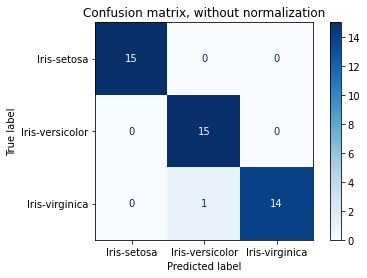

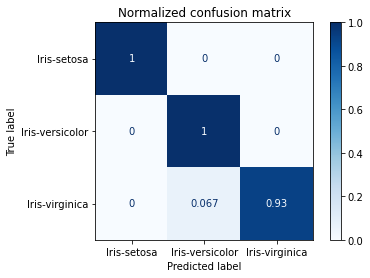

In [ ]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(m, X_test, y_test,
                                 display_labels=iris['class'].unique(),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

#### Save the model for later use

We might want to save our model for later use. 

For example, we could embed our model into a webservice or mobile application. So we use the method `dump()` from the joblib package to save the model to a file.

In [ ]:
dump(m, 'iris-classifier.dmp')

['iris-classifier.dmp']

In [ ]:
ic = load('iris-classifier.dmp')
confusion_matrix(y_test, ic.predict(X_test))

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

### 4.2 Decision tree classifier


### TODO 4

Write code to build a decision tree classifier, using the `DecisionTreeClassifier` class provided by scikit-learn. 

Similarly to 4.1 above, your code should build, train, and test the classifier, compute its accuracy, display the confusion matrices, save the model to a file for later use, load it from file and confirm that it's working.


In [ ]:
dt = DecisionTreeClassifier()

dt.fit(X_train,np.ravel(y_train))


feature_names = iris.columns[:4]
print(feature_names)



Index(['sepal_length', ' sepal_width', 'petal_length', 'petal_width'], dtype='object')


Here, we are visualizing the decision tree:

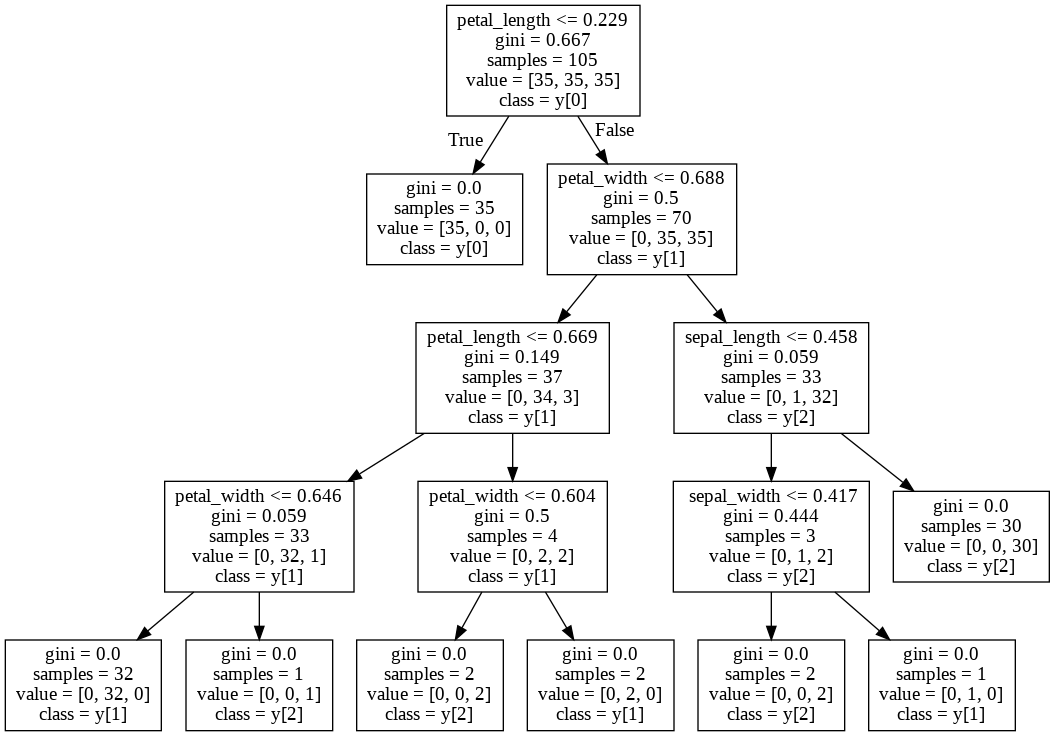

In [ ]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, feature_names=feature_names, class_names=True )

(graph, ) = graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [ ]:
dt.predict(X_test)
dt.score(X_test,y_test)

0.9777777777777777

## CONCLUSION

### LESSONS LEARNED


This was a guided, hands-on assignment that exposed to some basic machine learning concepts, and provided a nice sandbox to test and implement machine learning algorithms.

There were a few things that stood out to me while working through this assignment. 

First of, it is shockingly easy to compartmentalize data into a easily mendable form. The use of pandas dataframes really illustrates this. I find myself in similar disbelief that clean, easy to read matrices of plots can be created in just TWO lines of code leveraging seaborn and matplotlib. I was not aware how simple all of these libraries make it to process and visualize complex data.

In a similar vein, the ability to implement machine learning algorithms in concert with data pre-processing/cleaning by leveraging a handful of libraries in just several lines of code is eye-opening. While I acknowledge this report probably only scratches the surface of how complex machine learning is as a domain, and that there are many ML problems that require massive codebases, I still can't help but feel delighted that this technology is not only accessible, but possesses so many hands-on resources to learn and expand my knowledge.

I really enjoyed being able to use machine learning to do something useful, like classifying flower species just by training models using available data. This practical assingment really made me realize the extent to which machine learning can be useful, and gets my brain to start thinking of all the possible applications outside of classifying flowers, and I very much look forward to diving deeper into this topic.